<a href="https://colab.research.google.com/github/thiago2608santana/Analise_Series_Temporais/blob/main/Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Definir o tamanho das figuras para todos os plots**

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]

## Simulate AR(2) Process

$y_t = 0.33y_{t-1} + 0.5y_{t - 2}$

In [3]:
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0, 0])

In [4]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

(0.0, 200.0)

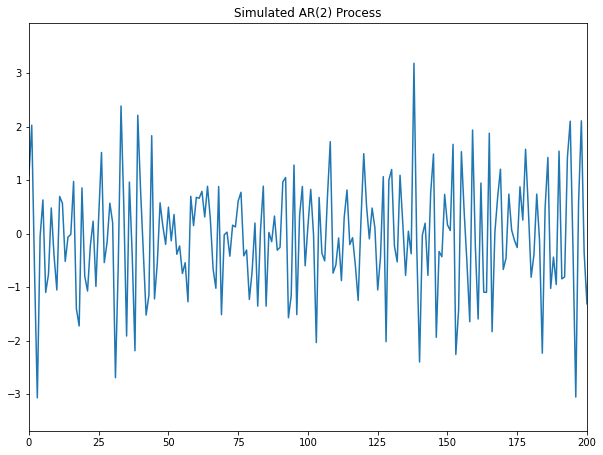

In [5]:
plt.plot(AR2_process)
plt.title('Simulated AR(2) Process')
plt.xlim(0, 200)

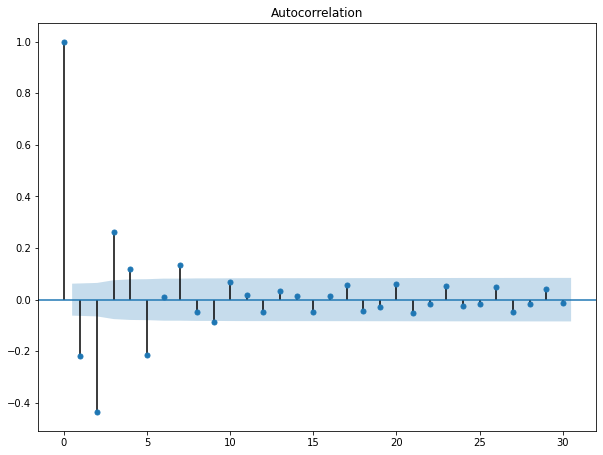

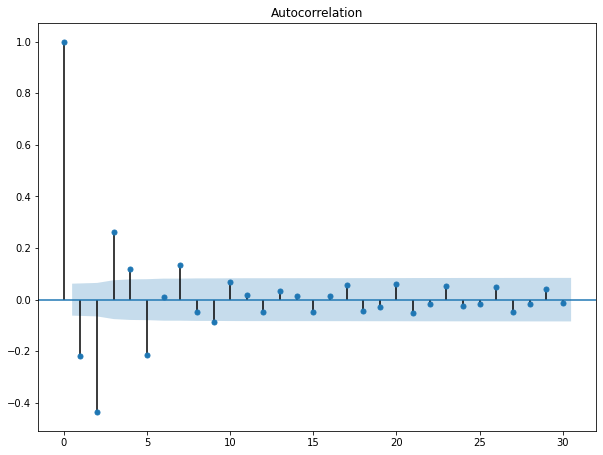

In [6]:
plot_acf(AR2_process)

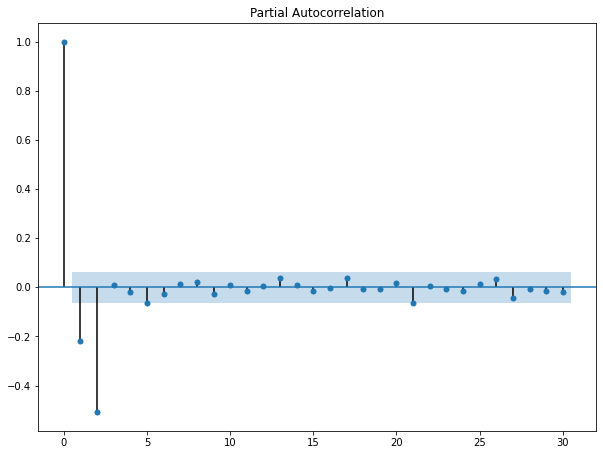

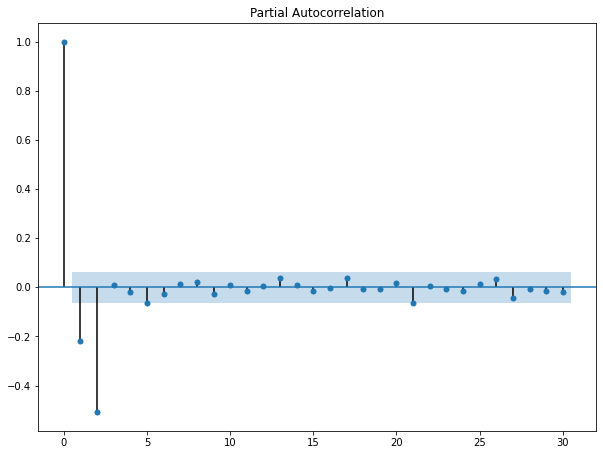

In [7]:
plot_pacf(AR2_process)

In [8]:
rho, sigma = yule_walker(AR2_process, 2, method='mle')

In [9]:
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.32791701 0.50772774]
sigma: 0.9947219024034755


## Simulate AR(3) Process

$y_t = 0.33y_{t - 1} + 0.5y_{t - 2} + 0.07y_{t - 3}$

In [10]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma3 = np.array([1, 0, 0, 0])

In [14]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=10000)

(0.0, 200.0)

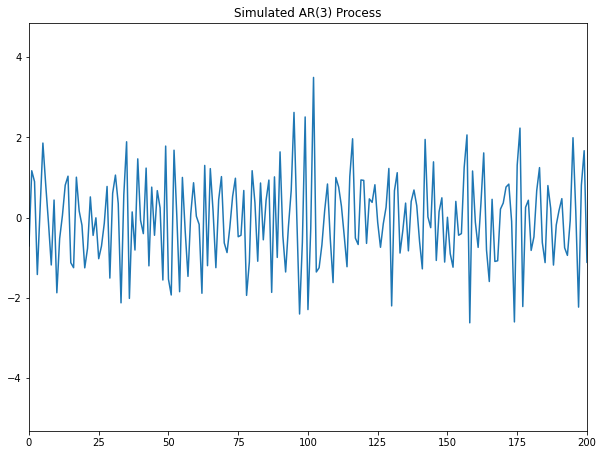

In [15]:
plt.plot(AR3_process)
plt.title('Simulated AR(3) Process')
plt.xlim(0, 200)

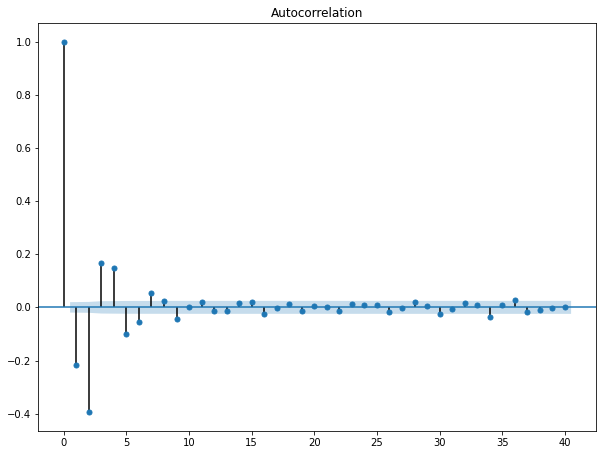

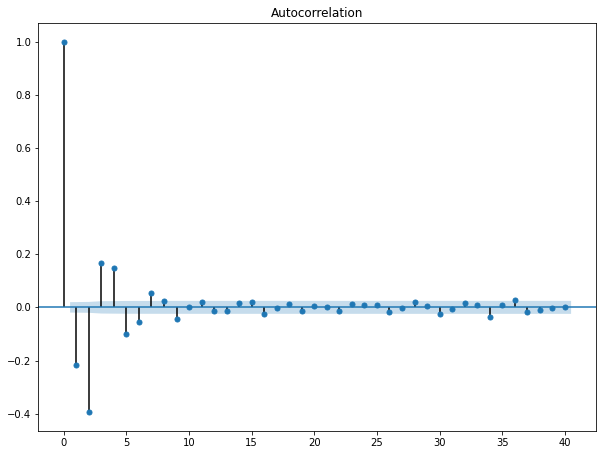

In [16]:
plot_acf(AR3_process)

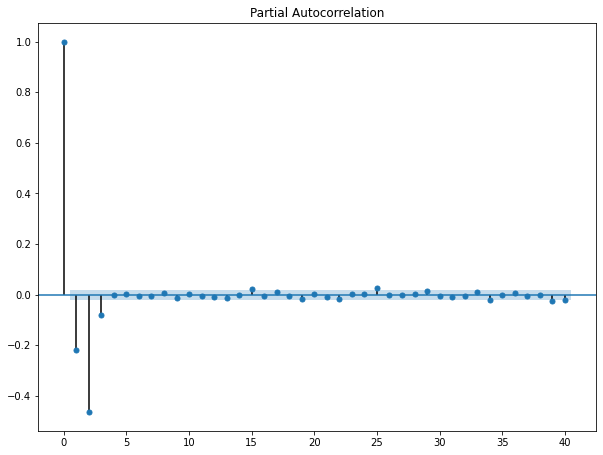

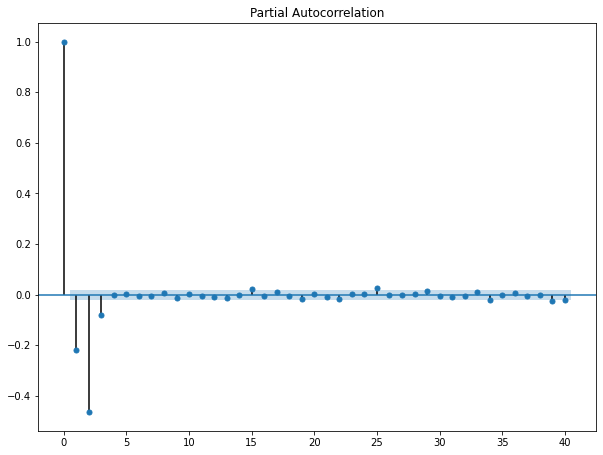

In [17]:
plot_pacf(AR3_process)

In [18]:
rho, sigma = yule_walker(AR3_process, 3, method='mle')

In [19]:
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.35604676 0.48963469 0.07880605]
sigma: 0.998231375120013


## Mini Project: Model Johnson&Johnson Quarterly Earnings per Share (EPS)

In [20]:
data = pd.read_csv('/content/drive/MyDrive/Analise_Series_Temporais_Datasets/jj.csv')

In [21]:
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83],
 <a list of 84 Text major ticklabel objects>)

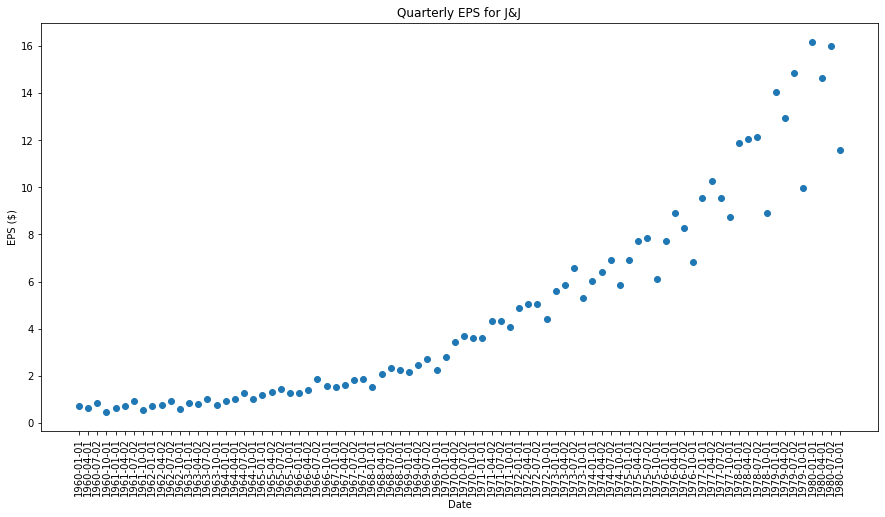

In [22]:
plt.figure(figsize=(15, 7.5))
plt.scatter(data['date'], data['data'])
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)

## Transformar os dados utilizando o log da diferença para tornar o dado estacionário

In [23]:
data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])

In [24]:
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


Text(0.5, 1.0, 'Log Difference of Quarterly EPS for J&J')

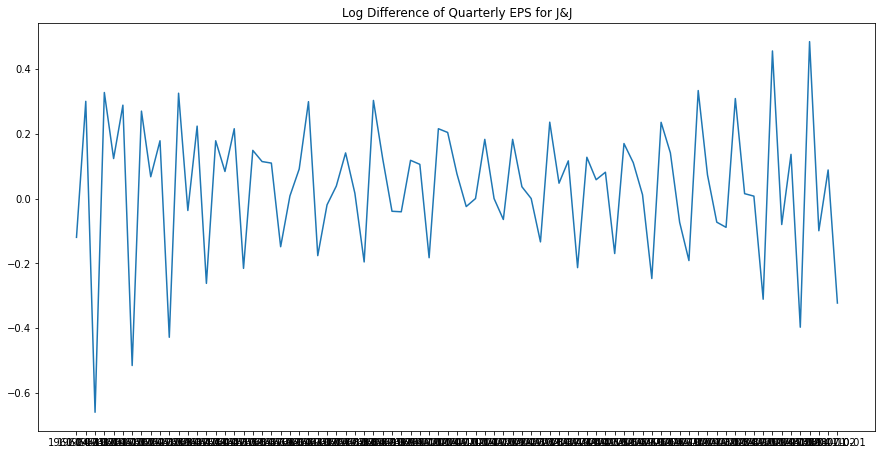

In [25]:
plt.figure(figsize=(15, 7.5))
plt.plot(data['date'], data['data'])
plt.title('Log Difference of Quarterly EPS for J&J')

**Testar a série temporal para verificar se é estacionária. Lembrando que:**
1. Não pode haver trend
2. Deve possuir a mesma variância ao longo da série
**O teste ad fuller tem a hipótese nula $H_0$ de que a série não é estacionária e caso obtenha um p-value < 0.05 rejeita-se essa hipótese e conclui-se que temos umas série estacionária**

In [26]:
ad_fuller_result = adfuller(data['data'])

In [28]:
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'P-valuec: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811839
P-valuec: 0.000414973140444062


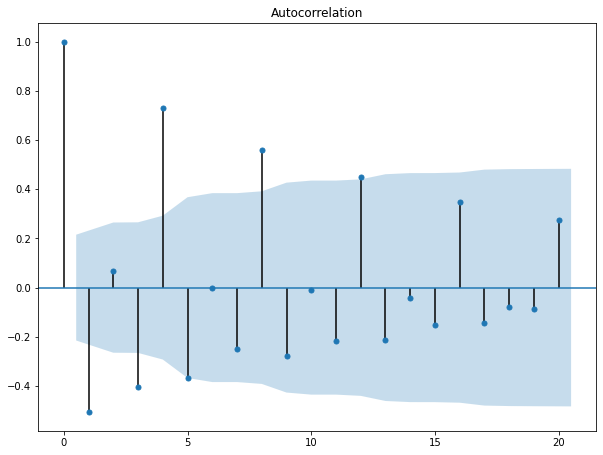

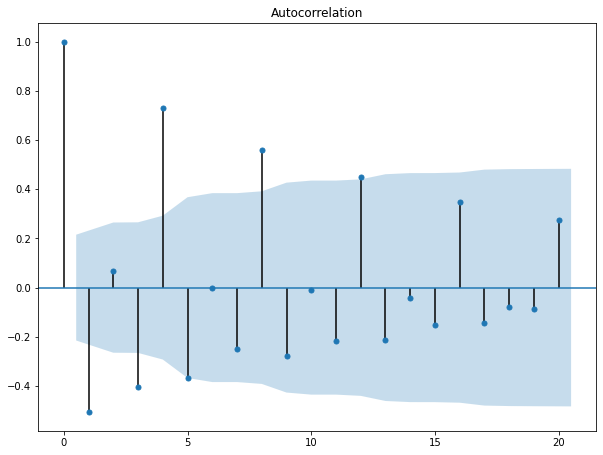

In [29]:
plot_acf(data['data'])

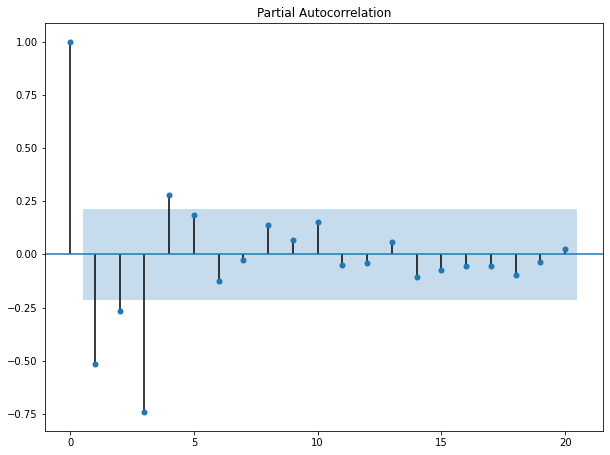

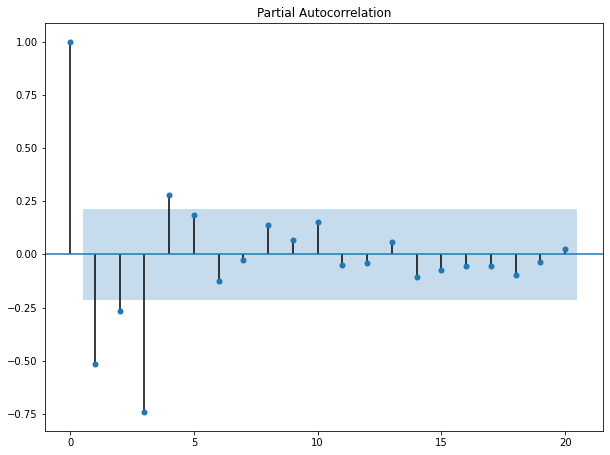

In [30]:
plot_pacf(data['data'])

## Tentar um modelo AR(4)

In [31]:
rho, sigma = yule_walker(data['data'], 4)

In [32]:
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175
